## Analysis Tasks

Basic Statistics tasks :

* Which store has maximum sales

* Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

* Which store/s has good quarterly growth rate in Q3’2012

* Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

* Provide a monthly and semester view of sales in units and give insights

Statistical Model

* For Store 1 – Build prediction models to forecast demand

* Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

* Change dates into days by creating new variable.

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Dataset 
The data contains these features:

* Store - the store number

* Date - the week of sales

* Weekly_Sales - sales for the given store

* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

* Temperature - Temperature on the day of sale

* Fuel_Price - Cost of fuel in the region

* CPI – Prevailing consumer price index

* Unemployment - Prevailing unemployment rate

In [68]:
df = pd.read_csv('Walmart_Store_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [70]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [71]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [73]:
df.columns = map(str.lower, df.columns)
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [74]:
df.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [75]:
# Splitting Day, Month, Year 
df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


### Which stores have maximum and minimum sales ? 

In [76]:
total_sale_for_each_store = df.groupby('store')['weekly_sales'].sum().sort_values()


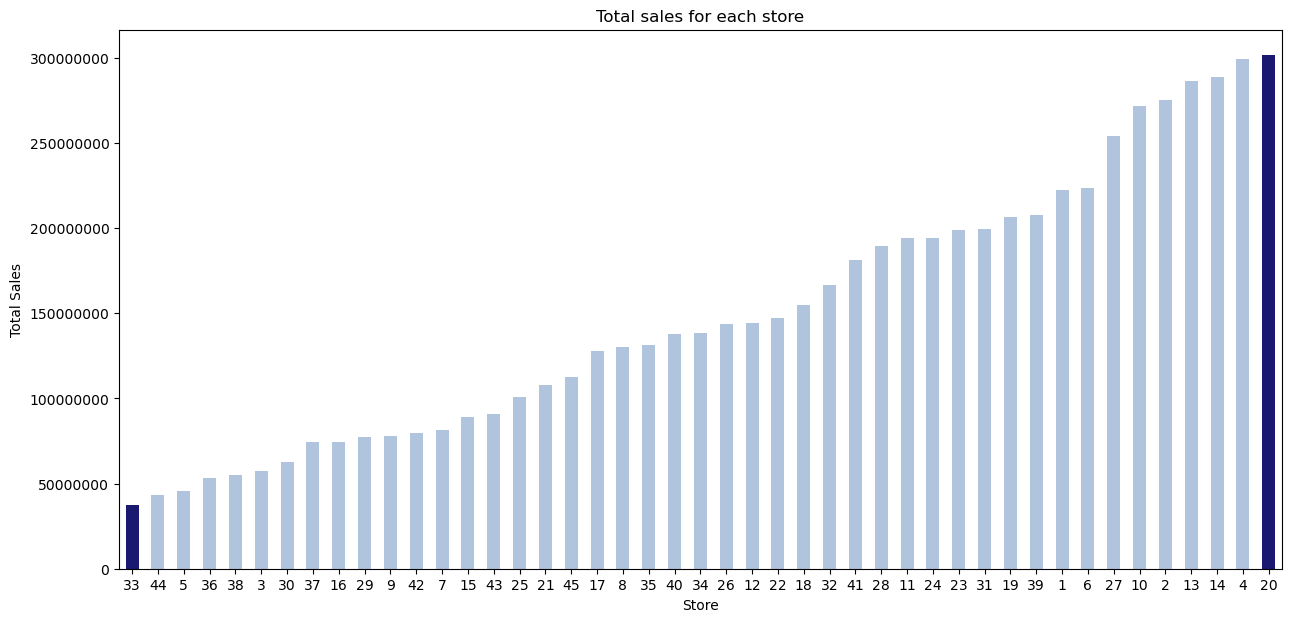

In [77]:
plt.figure(figsize=(15,7))
clrs = ['lightsteelblue' if ((x < max (total_sale_for_each_store)) and (x > min(total_sale_for_each_store))) else 'midnightblue' for x in total_sale_for_each_store]
ax = total_sale_for_each_store.plot(kind='bar', color=clrs)
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

In [78]:
print("The store with the maximum sale is 20 with: " + str(total_sale_for_each_store.max()),"$")
print("The store with the minimum sale is 33 with: " + str(total_sale_for_each_store.min()),"$")

The store with the maximum sale is 20 with: 301397792.46 $
The store with the minimum sale is 33 with: 37160221.96 $


In [79]:
sales_std = df.groupby('store')['weekly_sales'].std().sort_values(ascending=True)
print(f'The store with the highest sales variability is {sales_std.index[0]} with {sales_std.max().round(0)} $')

The store with the highest sales variability is 37 with 317570.0 $


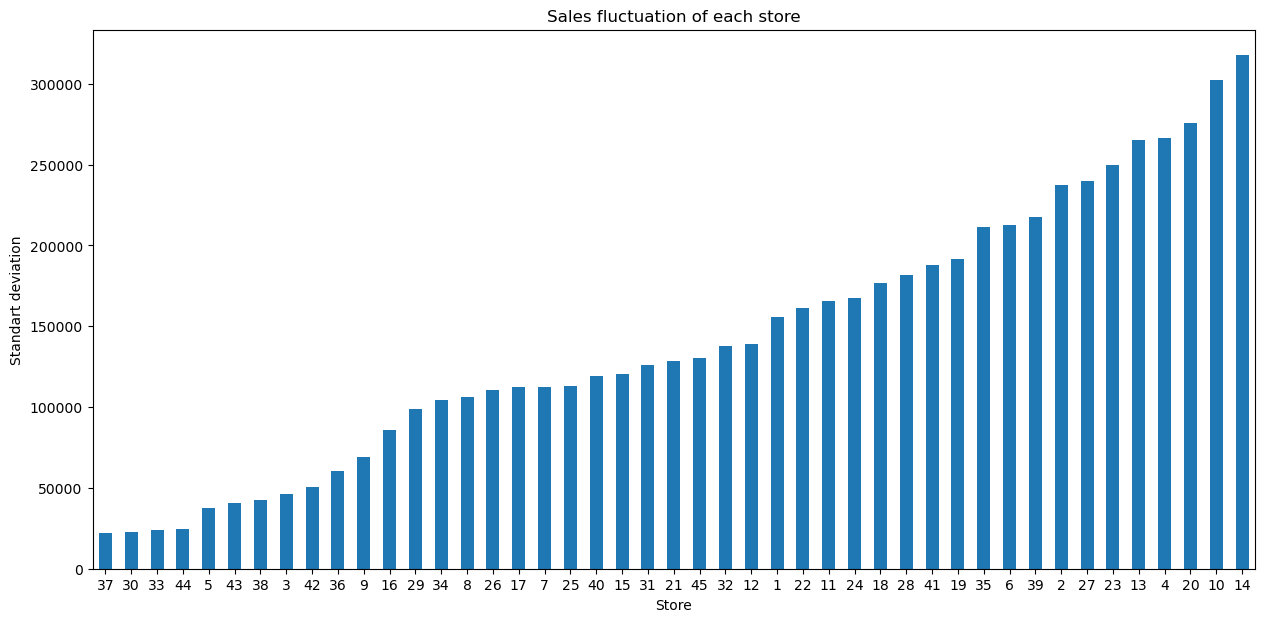

In [80]:
plt.figure(figsize=(15,7))
ax1 = sales_std.plot(kind='bar')
plt.xticks(rotation=0)
# plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Sales fluctuation of each store')
plt.xlabel('Store')
plt.ylabel('Standart deviation');

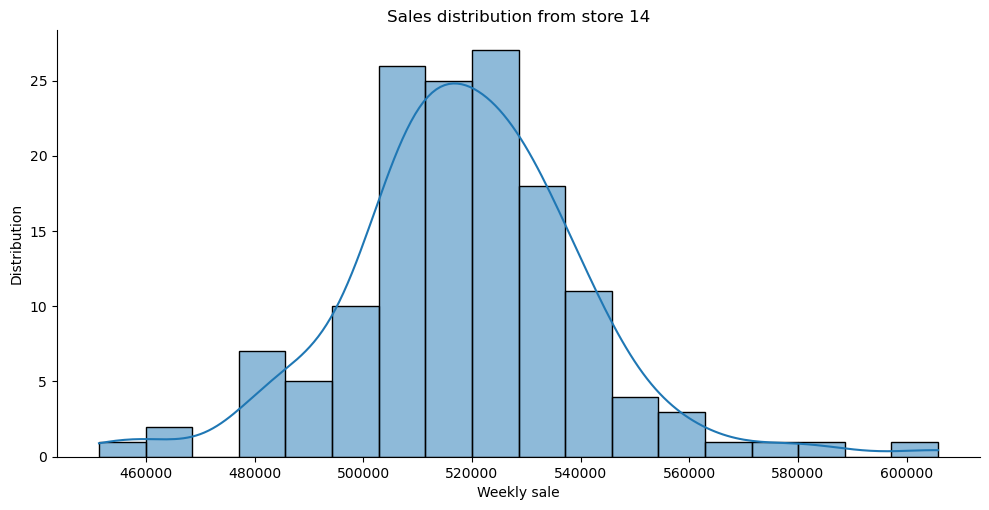

In [81]:
sns.displot(df[df['store'] == sales_std.index[0]]['weekly_sales'], kde=True, aspect=2, height=5)

plt.gca().ticklabel_format(useOffset=False, style='plain', axis='x')

plt.title('Sales distribution from store 14')
plt.xlabel('Weekly sale')
plt.ylabel('Distribution');

plt.show()

In [82]:
#Coefficient of mean to standard deviation : std / mean 
coef_mean_std = df.groupby('store')['weekly_sales'].std() / df.groupby('store')['weekly_sales'].mean()
coef_mean_std.sort_values(ascending=False)


store
35    0.229681
7     0.197305
15    0.193384
29    0.183742
23    0.179721
21    0.170292
45    0.165613
16    0.165181
18    0.162845
36    0.162579
25    0.159860
10    0.159133
14    0.157137
22    0.156783
39    0.149908
41    0.148177
12    0.137925
28    0.137330
6     0.135823
27    0.135155
19    0.132680
13    0.132514
20    0.130903
4     0.127083
9     0.126895
17    0.125521
24    0.123637
40    0.123430
2     0.123424
11    0.122262
5     0.118668
32    0.118310
8     0.116953
3     0.115021
38    0.110875
26    0.110111
34    0.108225
1     0.100292
33    0.092868
42    0.090335
31    0.090161
44    0.081793
43    0.064104
30    0.052008
37    0.042084
Name: weekly_sales, dtype: float64

### Which store/s has good quarterly growth rate in Q3’2012? 

In [83]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [84]:
Q3 = df[(df['date'] > '2012-07-01') & (df['date'] < '2012-09-30')].groupby('store')['weekly_sales'].sum().sort_values(ascending=True)

In [85]:
clrs1 =  ['lightsteelblue' if ((x < max (Q3)) and (x > min(Q3))) else 'midnightblue' for x in Q3]

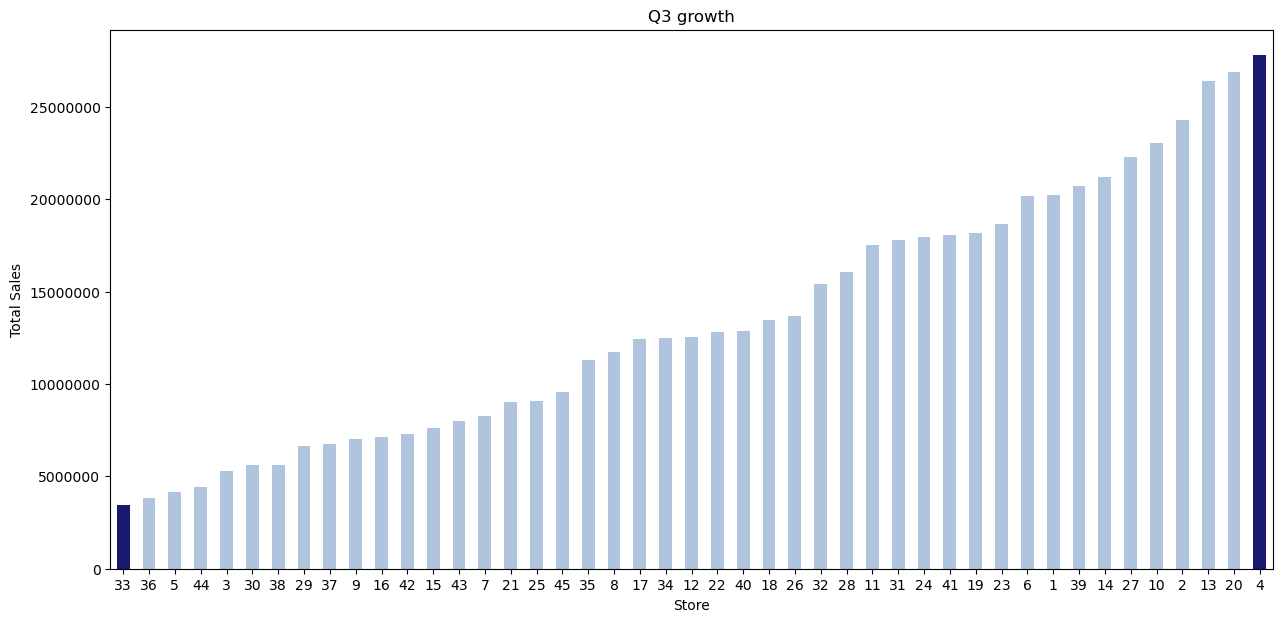

In [86]:
plt.figure(figsize=(15,7))
Q3.plot(kind='bar', color=clrs1)
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Q3 growth')
plt.xlabel('Store')
plt.ylabel('Total Sales');

In [87]:
#Sales for second Quaterly in 2012
Q2 = df[(df['date'] > '2012-04-01') & (df['date'] < '2012-06-30')].groupby('store')['weekly_sales'].sum().sort_values(ascending=True)

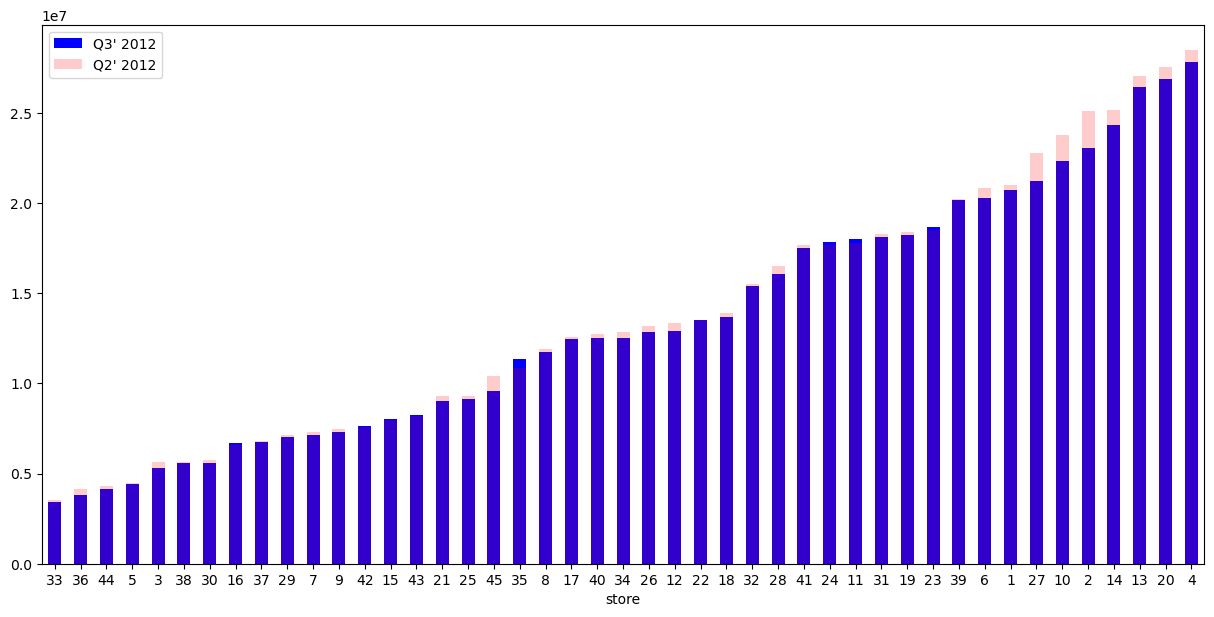

In [88]:
plt.figure(figsize=(15,7))

# Plotting Q3 sales
ax = Q3.plot(kind='bar', legend=True, color='b')

# Plotting Q2 sales on the same axes
Q2.plot(kind='bar', ax=ax, legend=True, color='r', alpha=0.2)

# Add legends for Q2 and Q3
plt.legend(["Q3' 2012", "Q2' 2012"])
plt.xticks(rotation=0)
# Show the plot
plt.show()

### Holidays which have higher sales than the mean sales in non-holiday season for all stores together

Holiday Events

* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [89]:
holiday_sales = df.groupby('date')['weekly_sales'].sum().sort_values(ascending=True)
super_bowl =['12-2-2010', '11-2-2011', '10-2-2012']
labour_day =  ['10-9-2010', '9-9-2011', '7-9-2012']
thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [90]:
holidays = {
    'Super Bowl': super_bowl,
    'Labour Day': labour_day,
    'Thanksgiving': thanksgiving,
    'Christmas': christmas
}

/var/folders/56/ymqjlns93r5fv__q4lx2xr4r0000gn/T/ipykernel_909/177809149.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  holiday_sales[holiday_name] = df[df['date'].isin(dates)]['weekly_sales'].sum()
/var/folders/56/ymqjlns93r5fv__q4lx2xr4r0000gn/T/ipykernel_909/177809149.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


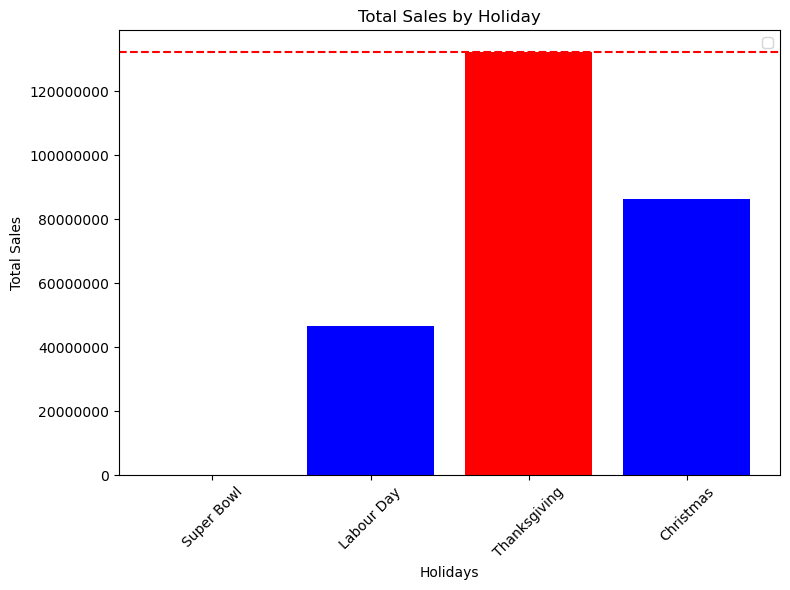

In [117]:
holiday_sales = {}
for holiday_name, dates in holidays.items():
    holiday_sales[holiday_name] = df[df['date'].isin(dates)]['weekly_sales'].sum()

max_sales = max(holiday_sales.values())


colors = ['red' if sales == max_sales else 'blue' for sales in holiday_sales.values()]


plt.figure(figsize=(8, 6))
plt.bar(holiday_sales.keys(), holiday_sales.values(), color=colors)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel('Holidays')
plt.ylabel('Total Sales')
plt.title('Total Sales by Holiday')
plt.xticks(rotation=45)

# Add a legend
plt.axhline(max_sales, color='red', linestyle='--')
plt.legend()

plt.show()

In [101]:
yearly_sales = df.groupby('year')['weekly_sales'].sum()
yearly_sales

year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: weekly_sales, dtype: float64

### Show a monthly review per year 

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
 8   day           6435 non-null   int32         
 9   month         6435 non-null   int32         
 10  year          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


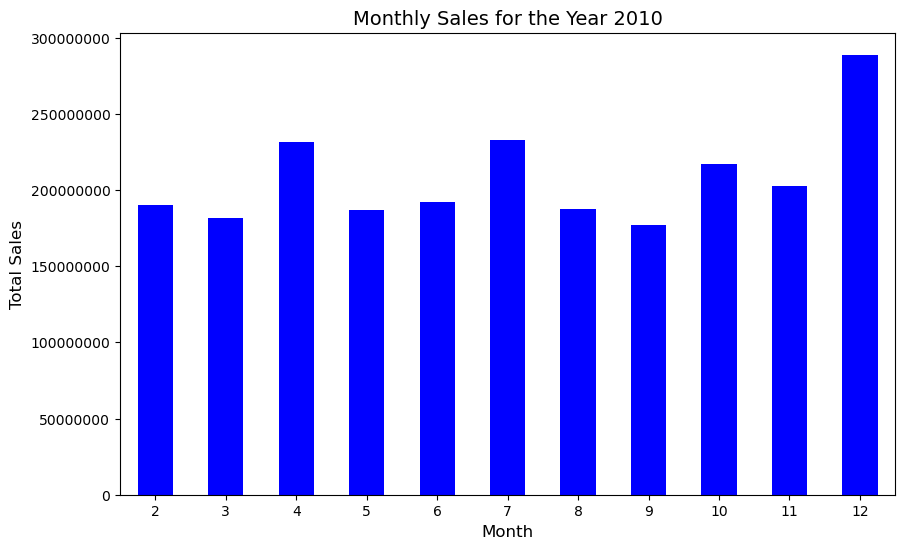

In [121]:
df_2010 = df[df['date'].dt.year == 2010]

monthly_sales_2010 = df_2010.groupby('month')['weekly_sales'].sum()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales_2010.plot(kind='bar', color='blue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales for the Year 2010', fontsize=14)
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

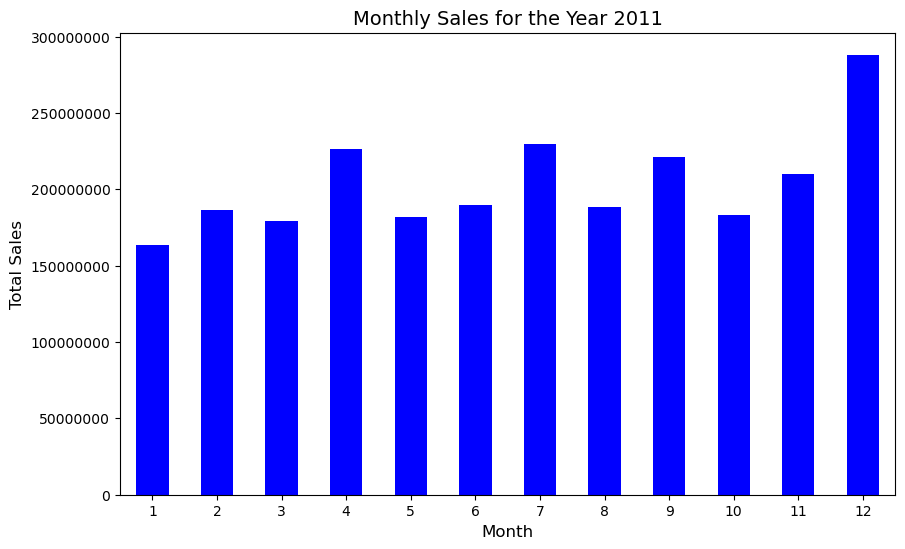

In [122]:
df_2011 = df[df['date'].dt.year == 2011]

monthly_sales_2011 = df_2011.groupby('month')['weekly_sales'].sum()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales_2011.plot(kind='bar', color='blue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales for the Year 2011', fontsize=14)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

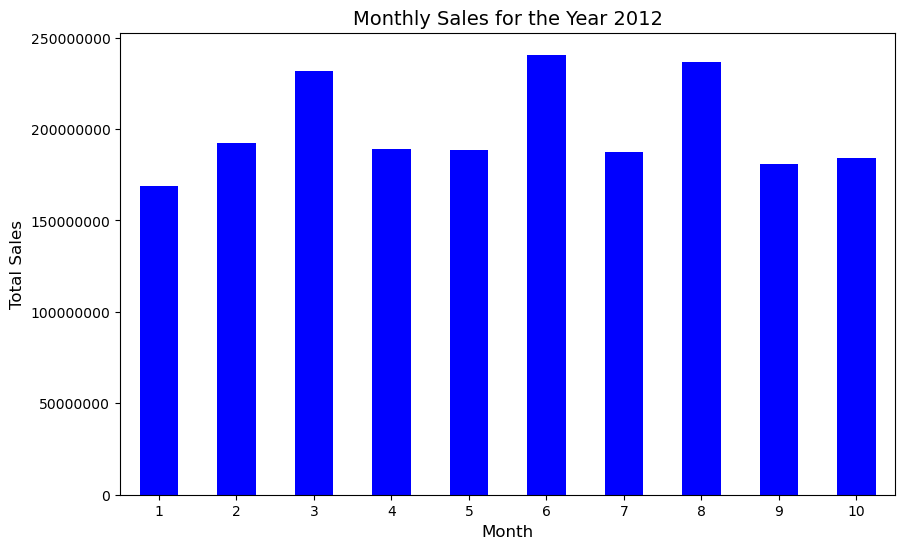

In [123]:
df_2012 = df[df['date'].dt.year == 2012]

monthly_sales_2012 = df_2012.groupby('month')['weekly_sales'].sum()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales_2012.plot(kind='bar', color='blue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales for the Year 2012', fontsize=14)
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

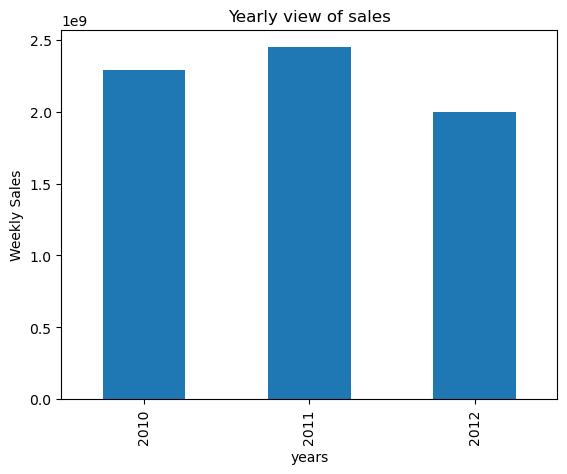

In [125]:
# Yearly view of sales
plt.figure(figsize=(10,6))
df.groupby("year")[["weekly_sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");